In [45]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=3d7df3054b1007684ebdf4e792159c1fab243a89448f859aba117b4c8b2fca39
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=1810a3ccaa5c6c31e4cf0047e3113292637c22af42c4a15fe7a59aa6a1133df8
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0/ddd93af16d5855dd9bad417623e70948fdac119d1d34fb17c8
Successfully built fst-pso miniful
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0

In [40]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.9 MB/s eta 0:00:00


In [1]:
!pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10216 sha256=35930e2b2f1841d103739c36577bb70511b66557074c7d0cebf470588f63326b
  Stored in directory: /root/.cache/pip/wheels/51/e4/5c/d3610ed4476515e540ff4096e3e9a8a3e701dedfe1072eb000
Successfully built pad_sequences


In [ ]:
!pip install -U spacy

In [ ]:
!python -m spacy download en_core_web_sm

# Importing libraries

In [80]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from matplotlib import pyplot as plt

from nltk.corpus import brown
from nltk.corpus import treebank
from nltk.corpus import conll2000

import seaborn as sns

from gensim.models import KeyedVectors

import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN, RNN
from keras.models import Model
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import nltk
import networkx as nx
from tqdm import tqdm

Download POS tagged corpora from nltk

In [2]:
nltk.download('universal_tagset')
nltk.download('conll2000')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

# Preprocessing

In [3]:
conll_corpus = conll2000.tagged_sents(tagset='universal')

In [4]:
len(conll_corpus)

10948

In [5]:
tagged_sentences=[]

In [6]:
tagged_sentences=conll_corpus

In [7]:
#separate the text and labels and put it in separate lists
text=[]
label=[]
for i in range (len(tagged_sentences)):
  X_sent=[]
  Y=[]
  for sent in tagged_sentences[i] :
    X_sent.append(sent[0])
    Y.append(sent[1])
    
  text.append(X_sent)
  label.append(Y)



In [8]:
#lenthg of both uniqe words and unique tags 
num_words = len(set([word.lower() for sentence in text for word in sentence]))
num_tags   = len(set([word.lower() for sentence in label for word in sentence]))

In [9]:
print("Number of tagged sentece: ",len(tagged_sentences))

Number of tagged sentece:  10948


In [10]:
print("Number of word: ",num_words)


Number of word:  19460


In [11]:
print("Number of tags",num_tags)

Number of tags 12


In [12]:
print(text[1])
print(label[1])

['Chancellor', 'of', 'the', 'Exchequer', 'Nigel', 'Lawson', "'s", 'restated', 'commitment', 'to', 'a', 'firm', 'monetary', 'policy', 'has', 'helped', 'to', 'prevent', 'a', 'freefall', 'in', 'sterling', 'over', 'the', 'past', 'week', '.']
['NOUN', 'ADP', 'DET', 'NOUN', 'NOUN', 'NOUN', 'PRT', 'VERB', 'NOUN', 'PRT', 'DET', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'VERB', 'PRT', 'VERB', 'DET', 'NOUN', 'ADP', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', '.']


In [13]:
#check the length of the input and the output of each sentence it should be equal in size
print(len(text[1]))
print(len(label[1]))

27
27


## Vectorise

From word text to indecies 

In [14]:
word_tokenizer = Tokenizer()                      # instantiate tokeniser
word_tokenizer.fit_on_texts(text)                    # fit tokeniser on data
text_encoded = word_tokenizer.texts_to_sequences(text)  # use the tokeniser to encode input sequence

tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(label)
label_encoded = tag_tokenizer.texts_to_sequences(label)

In [15]:
POS_label=tag_tokenizer.word_index

In [16]:
print(text_encoded[0])
print(label_encoded[0])

[1571, 7, 2, 1847, 15, 1088, 190, 5, 202, 242, 1089, 5757, 73, 378, 604, 9, 469, 1, 249, 9, 1645, 2736, 1, 4780, 5, 569, 6, 1258, 1366, 22, 727, 8, 503, 10, 7251, 7252, 3]
[1, 4, 5, 1, 2, 8, 2, 9, 2, 5, 6, 1, 4, 1, 1, 4, 1, 3, 6, 4, 1, 1, 3, 2, 9, 2, 5, 6, 1, 4, 1, 11, 1, 9, 6, 1, 3]


## Padding

In [17]:
#use padding to make the sentences size equal in length
lengths = [len(seq) for seq in text_encoded]
print("Length of longest sentence: {}".format(max(lengths)))


Length of longest sentence: 78


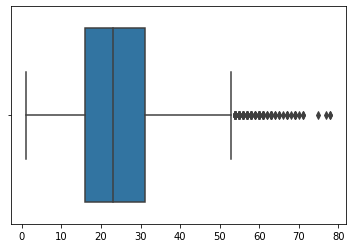

In [18]:
sns.boxplot(lengths)
plt.show()

In [19]:
from keras_preprocessing.sequence import pad_sequences
MAX_SEQ_LENGTH = 50  # sequences greater than 100 in length will be truncated

text_padded = pad_sequences(text_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
label_padded = pad_sequences(label_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")


In [20]:
print(text_padded[0])
print(label_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0 1571
    7    2 1847   15 1088  190    5  202  242 1089 5757   73  378  604
    9  469    1  249    9 1645 2736    1 4780    5  569    6 1258 1366
   22  727    8  503   10 7251 7252    3]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  4  5  1  2  8  2  9  2  5  6
  1  4  1  1  4  1  3  6  4  1  1  3  2  9  2  5  6  1  4  1 11  1  9  6
  1  3]


## Word Embedding

In [21]:
from gensim.models import Word2Vec

word2vec = Word2Vec(text, min_count=1)

In [22]:
vocabulary = word2vec.wv.key_to_index
print(vocabulary)

{',': 0, 'the': 1, '.': 2, 'of': 3, 'to': 4, 'a': 5, 'and': 6, 'in': 7, "'s": 8, 'for': 9, 'that': 10, '$': 11, 'The': 12, '``': 13, "''": 14, 'is': 15, 'said': 16, '%': 17, 'on': 18, 'million': 19, 'from': 20, 'by': 21, 'at': 22, 'it': 23, 'as': 24, 'was': 25, 'with': 26, 'Mr.': 27, 'be': 28, 'are': 29, 'its': 30, "n't": 31, 'an': 32, 'has': 33, 'have': 34, 'or': 35, 'will': 36, 'he': 37, 'company': 38, 'were': 39, 'year': 40, 'they': 41, 'would': 42, 'which': 43, 'says': 44, 'about': 45, '--': 46, 'more': 47, 'their': 48, 'In': 49, 'this': 50, 'up': 51, 'market': 52, 'billion': 53, 'share': 54, 'But': 55, 'had': 56, 'his': 57, 'but': 58, 'than': 59, 'also': 60, 'been': 61, 'who': 62, 'U.S.': 63, 'other': 64, ':': 65, 'I': 66, 'new': 67, 'some': 68, 'one': 69, 'Corp.': 70, 'not': 71, 'stock': 72, 'out': 73, 'New': 74, 'years': 75, '-RRB-': 76, '-LRB-': 77, ';': 78, 'could': 79, 'after': 80, 'all': 81, 'Inc.': 82, 'two': 83, 'It': 84, 'into': 85, 'because': 86, 'shares': 87, 'can': 88,

In [24]:
#assigne embedding for each word
em_size=100
vocab_size=len(word_tokenizer.word_index)+1
emb_weights=np.zeros((vocab_size,em_size))
word2id=word_tokenizer.word_index

for word, index in word2id.items():
  try:
        emb_weights[index, :] = word2vec.wv[word]
  except KeyError:
      pass

In [25]:
emb_weights.shape

(19461, 100)

In [26]:
label_cat=to_categorical(label_padded)

In [ ]:
label_cat.shape

(10948, 50, 13)

In [27]:
label_cat[0][44]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# Splitting data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(text_padded, label_cat,
    test_size=0.15, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.15, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (7909, 50)
X_test shape: (1643, 50)
y_train shape: (7909, 50, 13)
y_test shape: (1643, 50, 13)
X_val shape: (7909, 50, 13)
y val shape: (1643, 50, 13)


# RNN

In [29]:
def Vanila_RNN(embeddings=None,trainablee=False,emb_weightss=True):
  if emb_weightss:
    NUM_CLASSES = label_cat.shape[2]
    rnn_model = Sequential()

    # create embedding layer - usually the first layer in text problems
    rnn_model.add(Embedding(input_dim     =  vocab_size,         # vocabulary size - number of unique words in data
                            output_dim    =  em_size,          # length of vector with which each word is represented
                            input_length  =  MAX_SEQ_LENGTH,          # length of input sequence
                            
                            trainable     =  trainablee                    # False - don't update the embeddings
    ))

    # add an RNN layer which contains 64 RNN cells
    rnn_model.add(SimpleRNN(64, 
                  return_sequences=True  # True - return whole sequence; False - return single output of the end of the sequence
    ))
  else:
        NUM_CLASSES = label_cat.shape[2]
        rnn_model = Sequential()

        # create embedding layer - usually the first layer in text problems
        rnn_model.add(Embedding(input_dim     =  vocab_size,         # vocabulary size - number of unique words in data
                                output_dim    =  em_size,          # length of vector with which each word is represented
                                input_length  =  MAX_SEQ_LENGTH,          # length of input sequence
                                weights       = [embeddings],
                                trainable     =  trainablee                    # False - don't update the embeddings
        ))

        # add an RNN layer which contains 64 RNN cells
        rnn_model.add(SimpleRNN(64, 
                      return_sequences=True  # True - return whole sequence; False - return single output of the end of the sequence
        ))

  # add time distributed (output at each sequence) layer
  rnn_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

  rnn_model.compile(loss      =  'categorical_crossentropy',
                    optimizer =  'adam',
                    metrics   =  ['acc'])

  # check summary of the model
  rnn_model.summary()

  #fit model
  rnn_training = rnn_model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

  # visualise training history
  plt.plot(rnn_training.history['acc'])
  plt.plot(rnn_training.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc="lower right")
  plt.show()

  return rnn_model



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1946100   
                                                                 
 simple_rnn (SimpleRNN)      (None, 50, 64)            10560     
                                                                 
 time_distributed (TimeDistr  (None, 50, 13)           845       
 ibuted)                                                         
                                                                 
Total params: 1,957,505
Trainable params: 11,405
Non-trainable params: 1,946,100
_________________________________________________________________
Epoch 1/10
62/62 [==============================] - 6s 67ms/step - loss: 1.4551 - acc: 0.6012 - val_loss: 1.1698 - val_acc: 0.6455
Epoch 2/10
62/62 [==============================] - 2s 29ms/step - loss: 1.1171 - acc: 0.6544 - val_loss: 1.

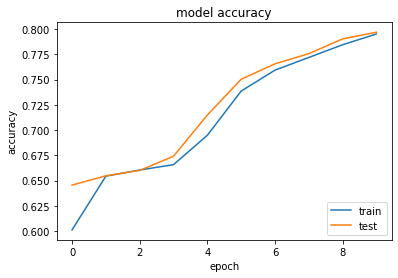

In [30]:
RNN1=Vanila_RNN()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           1946100   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50, 64)            10560     
                                                                 
 time_distributed_1 (TimeDis  (None, 50, 13)           845       
 tributed)                                                       
                                                                 
Total params: 1,957,505
Trainable params: 1,957,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
62/62 [==============================] - 8s 112ms/step - loss: 1.3083 - acc: 0.6254 - val_loss: 0.8856 - val_acc: 0.7572
Epoch 2/10
62/62 [==============================] - 3s 50ms/step - loss: 0.6386 - acc: 0.8387 - val_loss: 0.42

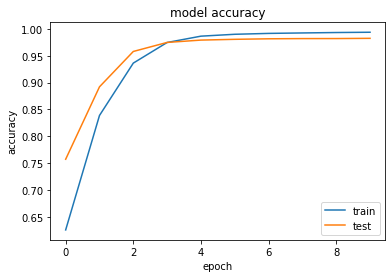

In [31]:
RNN2=Vanila_RNN(trainablee=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           1946100   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 64)            10560     
                                                                 
 time_distributed_2 (TimeDis  (None, 50, 13)           845       
 tributed)                                                       
                                                                 
Total params: 1,957,505
Trainable params: 1,957,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
62/62 [==============================] - 9s 129ms/step - loss: 1.0733 - acc: 0.7740 - val_loss: 0.6231 - val_acc: 0.8475
Epoch 2/10
62/62 [==============================] - 4s 72ms/step - loss: 0.4741 - acc: 0.8782 - val_loss: 0.34

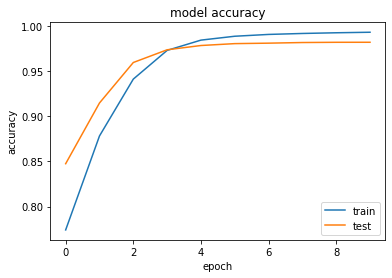

In [32]:
RNN3=Vanila_RNN(trainablee=True,emb_weightss=False,embeddings=emb_weights)

## Evaluation

In [33]:
loss, accuracy = RNN3.evaluate(X_test, y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

52/52 [==============================] - 1s 12ms/step - loss: 0.0571 - acc: 0.9819
Loss: 0.05714194476604462,
Accuracy: 0.9819111227989197


## Testing

In [37]:
import spacy
from spacy import displacy
from collections import Counter
import pandas as pd

In [38]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
nltk.download('punkt')

In [42]:
from nltk.tokenize import word_tokenize

In [77]:
def POS_Tagging(sample,MAX_SEQ_LENGTH):
  tokens = nltk.sent_tokenize(sample)
  corpus=[]
  for token in tokens:
    corpus.append(word_tokenize(token))
  text_encoded2 = word_tokenizer.texts_to_sequences(corpus)  # use the tokeniser to encode input sequence
  text_padded2 = pad_sequences(text_encoded2, maxlen=MAX_SEQ_LENGTH, padding="post", truncating="post")
  multi_class_out=RNN3.predict(text_padded2)
  sent=[]
  words=[]
  for i in range (len(multi_class_out)):
    for j in range (len(multi_class_out[i])):
      if np.argmax(multi_class_out[i][j]) !=0:
        sent.append(list(POS_label.keys()) [list(POS_label.values()).index(np.argmax(multi_class_out[i][j]))])

  tagging={"Text":[j for i in corpus for j in i],"POS":[i for i in sent ]}
  print(pd.DataFrame( tagging["POS"]))
  G=nx.from_pandas_edgelist(tagging, "Text", "POS", 
                           create_using=nx.MultiDiGraph())
  plt.figure(figsize=(12,12))

  pos = nx.spring_layout(G)
  nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
  plt.show()


In [78]:
sample = """Victory seemed unlikely. Mount Saint Michael were two sets down and St. Leo’s certainly had the upper hand in the third set, dominating 9 points to 2. Each time St. Leo’s scored, they pounded the ground in unison, further intimidating an already shaky Claremorris team. So how, in these circumstances, did they snatch victory from the jaws of almost certain defeat?
The first set seemed to suggest two teams who were equally matched. Michael’s fought point for point against a Leo’s team whose defence was almost impenetrable, yet Edel Nolan managed to hit home some impressive spikes. However, as the set drew to a close, they found themselves unable to finish the job and St Leo’s stormed into the second set with a 25-22 win in the first set under their belt.
This is where it all went wrong for Claremorris. Having lost the first set, their nerves took over and their difficulty settling into the match was evident in a plethora of unforced errors, despite excellent positioning by Nikki Hanley and impact substitutions by Lisa McGreal and Jackie Prendergast. They lost the second set 25-19 and hope began to fade for their 200+ supporters.
The third set began in similar fashion but sensing that they now had nothing to lose – except of course the All-Ireland Title – the team lifted their game tremendously, aided by the now deafening cries of their desperate supporters, led by Lisa Brett and Chloe Hughes. Strategic use of time outs by coach Fionnghuala King saw the girls finally settle into the match. She no doubt reminded them of their team mantra – no matter how badly things seem to be going ‘don’t lose your marbles’. Stephanie Mellet had a great run of serves and made a stunning save at this crucial point in the set. Aisling Croghan made some unbelievable hits from the wings and Edel Nolan shone as the driving force behind Mount St Michael’s incredible comeback. They won the third set 25-16 and St Leo’s game began to fall apart.
A fear of losing now defined their play, and they frequently only used two of their three hits, eager to simply get the ball across the net. Meanwhile, Claremorris grew in confidence, scoring a resounding victory in the fourth set 25-13.
As it finally dawned that Claremorris could actually win this match, the excitement and tension in the arena reached fever pitch, and the daddies on the sideline (Gerry Croghan & Con Nolan) riled up the crowd, ably assisted by vice-principal Margaret Burke. However, St Leo’s finally realised that it was still all to play for and once again their defence, led by Sinead Ruth, became near-impossible to break down. Edel Nolan made three excellent spikes in a row only to find each and every one returned. Long rallies defined the 5th and final set (first to 15 points but the team must win by 2 points) and every time Claremorris inched ahead St Leo’s reeled them in again. Finally, however, they reached 14 – 13 and faced their first match point. Sinead Croghan, whose strength was such a defining feature of her play up to this point, unfortunately hit the serve long and it was back to stalemate. Two more match points followed, but Mount St Michael couldn’t seem to finish Leo’s off. At last, with 2 sets all and 17-16 on the scoreboard, Nikki Hanley served, raced forward to set the ball and Edel Nolan spiked the girls to the sweetest victory of their lives. No wonder, then, she was named Most Valuable Player of the match.

"""

1/1 [==============================] - 0s 97ms/step
        0
0    noun
1    verb
2     adj
3       .
4    verb
..    ...
584  noun
585   adp
586   det
587  verb
588     .

[589 rows x 1 columns]


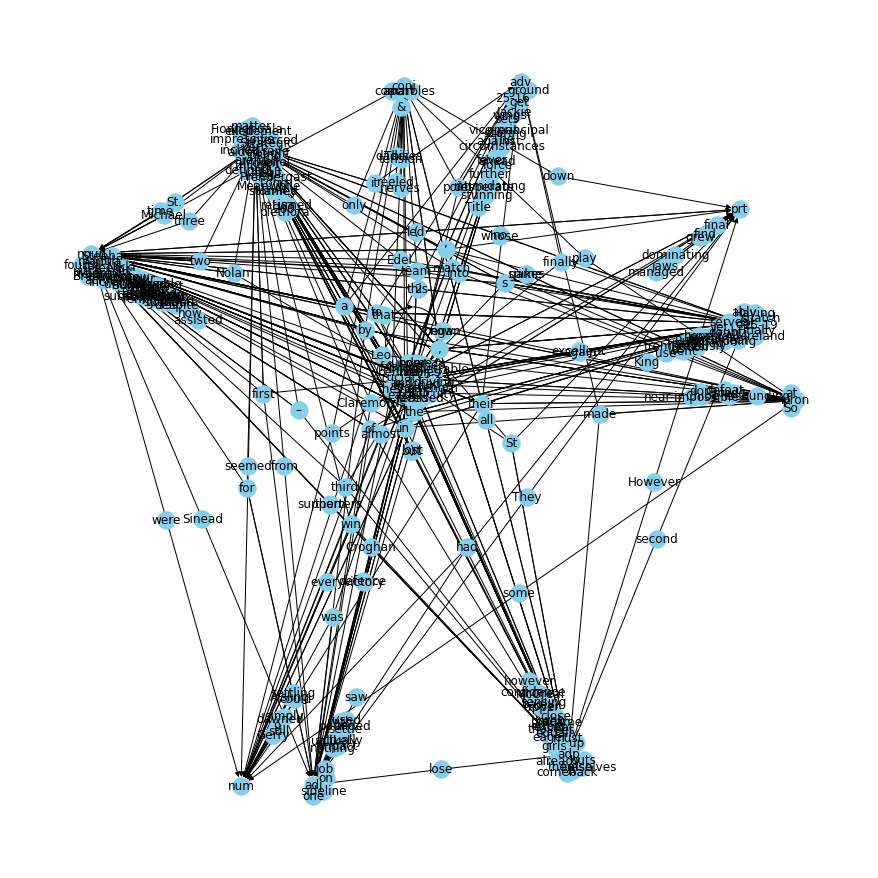

In [79]:
POS_Tagging(sample,50)

# POS Tagging using Spacy

In [81]:
document = nlp(sample)

In [82]:
#Set some display options for the visualizer
options = {"compact": True, "distance": 90, "color": "yellow", "bg": "black", "font": "Gill Sans"}



In [83]:
displacy.render(document, style="dep", options=options, jupyter=True)

In [84]:
text=[]
pos=[]
dep=[]

In [85]:
for token in document:
  text.append(token.text)
  pos.append(token.pos_)
  dep.append(token.dep_)
  print(token.text, token.pos_, token.dep_)

Victory NOUN nsubj
seemed VERB ROOT
unlikely ADJ oprd
. PUNCT punct
Mount PROPN compound
Saint PROPN compound
Michael PROPN nsubj
were AUX ROOT
two NUM nummod
sets NOUN attr
down ADP prt
and CCONJ cc
St. PROPN compound
Leo PROPN nsubj
’s PART case
certainly ADV advmod
had VERB conj
the DET det
upper ADJ amod
hand NOUN dobj
in ADP prep
the DET det
third ADJ amod
set NOUN pobj
, PUNCT punct
dominating VERB advcl
9 NUM nummod
points NOUN dobj
to ADP prep
2 NUM pobj
. PUNCT punct
Each DET det
time NOUN npadvmod
St. PROPN compound
Leo PROPN nsubj
’s PART case
scored VERB relcl
, PUNCT punct
they PRON nsubj
pounded VERB ROOT
the DET det
ground NOUN dobj
in ADP prep
unison NOUN pobj
, PUNCT punct
further ADV advmod
intimidating VERB advcl
an DET det
already ADV advmod
shaky ADJ amod
Claremorris PROPN compound
team NOUN dobj
. PUNCT punct
So ADV advmod
how SCONJ advmod
, PUNCT punct
in ADP prep
these DET det
circumstances NOUN pobj
, PUNCT punct
did AUX aux
they PRON nsubj
snatch VERB ROOT
vic

In [86]:
tagging={"Text":text,"POS":pos,"DEP":dep}

In [87]:
df=pd.DataFrame(tagging)

In [88]:
df

,Text,POS,DEP
0,Victory,NOUN,nsubj
1,seemed,VERB,ROOT
2,unlikely,ADJ,oprd
3,.,PUNCT,punct
4,Mount,PROPN,compound
...,...,...,...
693,of,ADP,prep
694,the,DET,det
695,match,NOUN,pobj
696,.,PUNCT,punct


In [93]:
G=nx.from_pandas_edgelist(df, "Text", "POS", 
                           create_using=nx.MultiDiGraph())

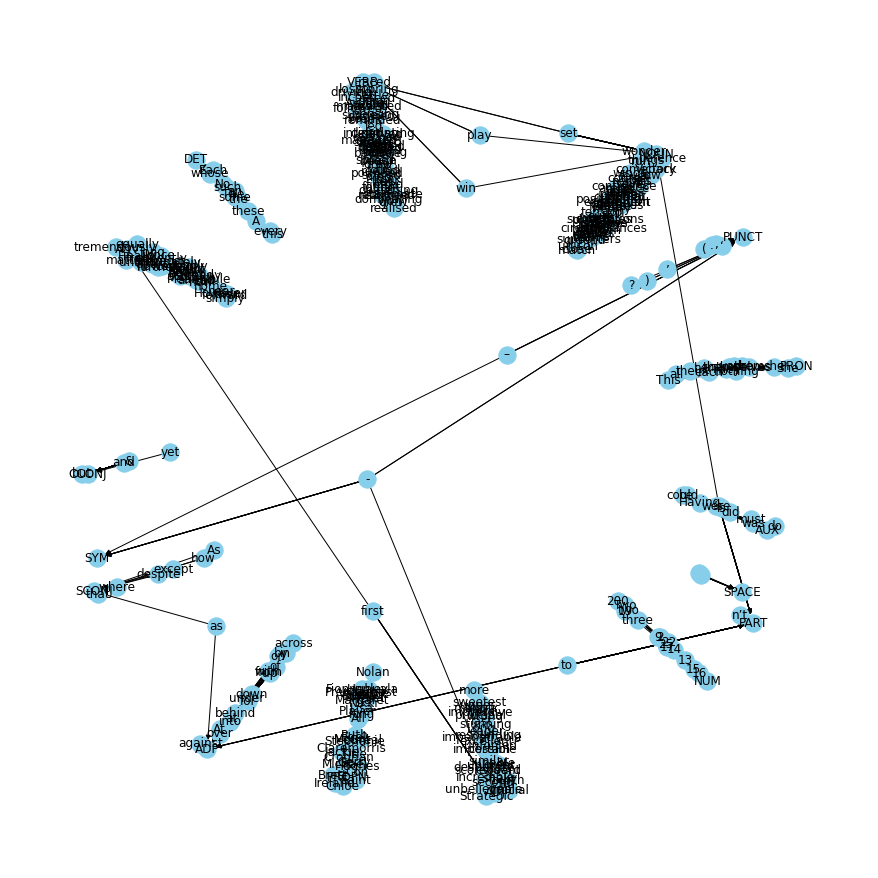

In [94]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()